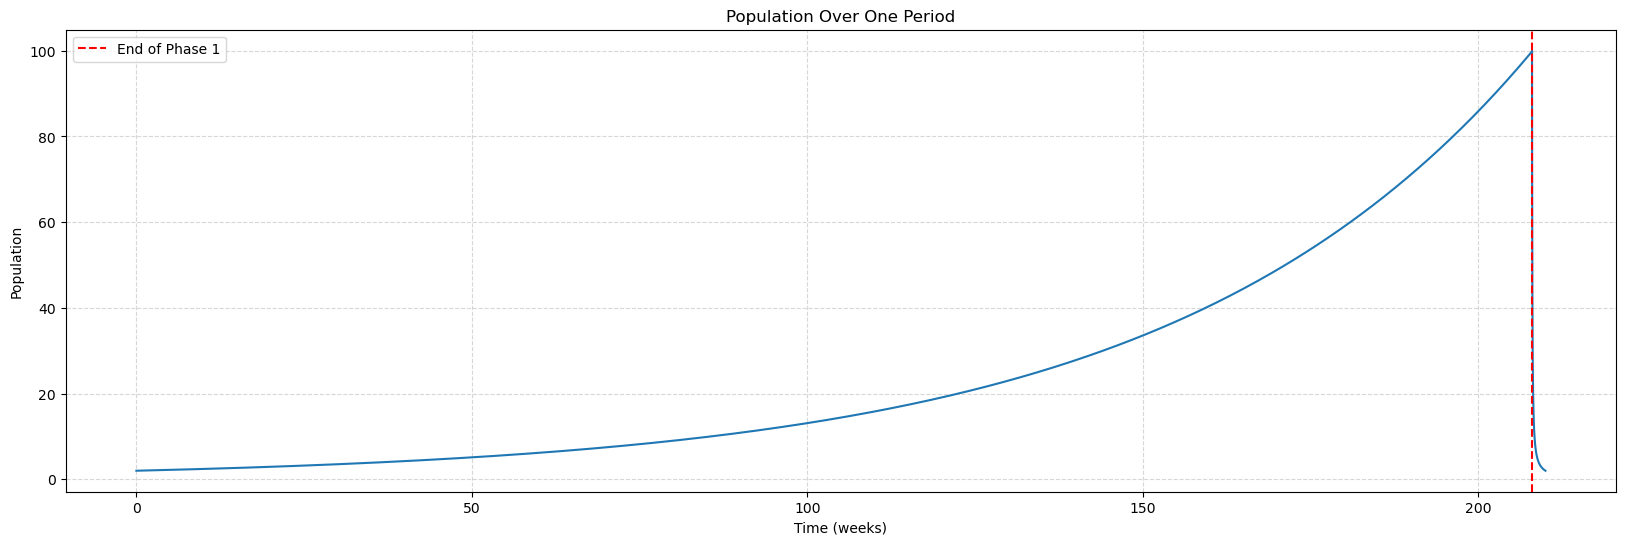

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

T1 = 208  # in weeks
T2 = 2  # in weeks
Q = 100
q = 2
a = 0.0188  # per week
b = 0.245  # per week

# Time arrays
t1 = np.linspace(0, T1, 500)  # Phase 1 time points
t2 = np.linspace(0, T2, 500)  # Phase 2 time points

# Population during Phase 1 (Exponential growth)
N1 = q * np.exp(a * t1)

# Population during Phase 2 (Quadratic decay)
N2 = Q / (1 + b * Q * (t2))

# Combine time and population arrays for plotting
t = np.concatenate([t1, T1 + t2])
N = np.concatenate([N1, N2])

# Plot
plt.figure(figsize=(20, 6))
plt.plot(t, N)
plt.axvline(T1, color='red', linestyle='--', label='End of Phase 1')
plt.xlabel('Time (weeks)')
plt.ylabel('Population')
plt.title('Population Over One Period')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

In [23]:
(1 / (1 + a))

-1.0

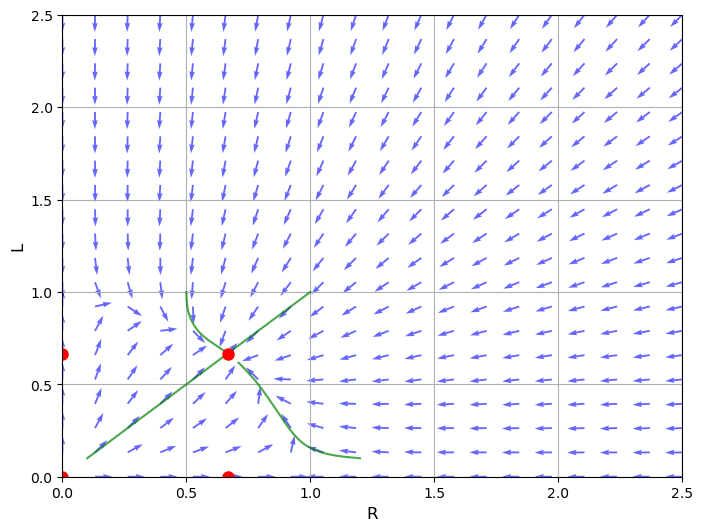

In [34]:
# Revised version of the code to avoid computation issues and ensure better performance
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
bifurcation_value = 1  # Bifurcation point
a = 1/2 * bifurcation_value  # a = 2 * (-1) = -2

# Define the system of equations
def system(t, state):
    R, L = state
    dR = R - (R**2 + a * R * L)
    dL = L - (L**2 + a * R * L)
    return [dR, dL]

# Create a grid in the first quadrant
R = np.linspace(0, 2.5, 20)
L = np.linspace(0, 2.5, 20)
R, L = np.meshgrid(R, L)

# Compute the vector field
dR = R - (R**2 + a * R * L)
dL = L - (L**2 + a * R * L)

# Normalize the vectors for better plotting
magnitude = np.sqrt(dR**2 + dL**2)
magnitude[magnitude == 0] = 1  # Avoid division by zero
dR /= magnitude
dL /= magnitude

# Plot the vector field
plt.figure(figsize=(8, 6))
plt.quiver(R, L, dR, dL, color='blue', alpha=0.6)

# Plot equilibrium points
equilibrium_points = [(0, 0), (1 / (1 + a), 1 / (1 + a))]

# for point in equilibrium_points:
#     if point[0] >= 0 and point[1] >= 0:  # Only plot points in the first quadrant
#         plt.plot(point[0], point[1], 'ro', markersize=8)

# Plot sample trajectories using solve_ivp for better stability
initial_conditions = [(0.1, 0.1), (1.2, 0.1), (0.5, 1.0), (1.0, 1.0)]
t_span = (0, 10)
t_eval = np.linspace(0, 10, 200)

# Plot trajectories
for ic in initial_conditions:
    sol = solve_ivp(system, t_span, ic, t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], 'g', alpha=0.7)

plt.plot(0, 0, 'ro', markersize = 8)
plt.plot(0, (1 / (1 + a)), 'ro', markersize = 8)
plt.plot(1 / (1 + a), 0, 'ro', markersize = 8)
plt.plot((1 / (1 + a)), (1 / (1 + a)), 'ro', markersize = 8)
plt.xlim(0, 2.5)
plt.ylim(0, 2.5)
plt.xlabel('R', fontsize=12)
plt.ylabel('L', fontsize=12)
# plt.title('Phase Plane in the First Quadrant with a = -2', fontsize=14)
# plt.legend()
plt.grid(True)
plt.show()
